In [29]:
library(RCurl)

In [30]:
library(jsonlite)

In [53]:
### setup
key = "?api_key=RGAPI-af7a1b02-c219-4758-8f5e-325bc511a758"
api_url = "https://kr.api.riotgames.com"

In [32]:
### get Summoner ID
operation = "/lol/summoner/v4/summoners/by-name/"
name = "김옥티"
url = paste0(api_url, operation, name, key)
page = getForm(url, query="")
data.summoner = fromJSON(page)

In [6]:
### get Champion Mastery
operation = "/lol/champion-mastery/v4/champion-masteries/by-summoner/"
url = paste0(api_url, operation, data.summoner$id, key)
data.mastery = fromJSON(getForm(url, query = ""))

In [7]:
### get MatchList
operation = "/lol/match/v4/matchlists/by-account/"
# champion
# queue
# season
# endTime
# beginTime
beginIndex = "&beginIndex=0"
endIndex = "&endIndex=30"
url = paste0(api_url, operation, data.summoner$accountId, key, endIndex, beginIndex)
data.matchList = fromJSON(getForm(url, query=""))$matches

In [8]:
cData = fromJSON('championsData.json')

In [9]:
data.summoner

$id
[1] "hwZGQdR2U9eTr3FmR6YfNK_6KolIWjeSx7p5j_n-6YepFQg"

$accountId
[1] "1tx3ze11tUDTcC8g7ZJm43Bg7-c1aEi6RzI5QkJ-5m1-"

$puuid
[1] "qa9oxRehiiowh9XB8PR-PPIyWmBD7WgfBuG4DLrC-POQkTddCPDSOrWhHqA7Ts16TFJPGld_WyCzLg"

$name
[1] "김옥티"

$profileIconId
[1] 3791

$revisionDate
[1] 1.582168e+12

$summonerLevel
[1] 112

In [10]:
str(data.matchList)

'data.frame':	30 obs. of  8 variables:
 $ platformId: chr  "KR" "KR" "KR" "KR" ...
 $ gameId    : num  4.16e+09 4.16e+09 4.16e+09 4.16e+09 4.16e+09 ...
 $ champion  : int  113 267 134 134 240 240 28 20 121 350 ...
 $ queue     : int  450 450 430 420 420 420 900 900 900 900 ...
 $ season    : int  13 13 13 13 13 13 13 13 13 13 ...
 $ timestamp : num  1.58e+12 1.58e+12 1.58e+12 1.58e+12 1.58e+12 ...
 $ role      : chr  "SOLO" "DUO_SUPPORT" "SOLO" "SOLO" ...
 $ lane      : chr  "BOTTOM" "NONE" "MID" "MID" ...


In [11]:
matchIds = head(data.matchList$gameId)

In [12]:
head(data.matchList$gameId)

[1] 4164684855 4164730563 4164595289 4164547046 4160873466 4160810892

In [13]:
### get TimeLine

In [14]:
operation = "/lol/match/v4/timelines/by-match/"

In [15]:
url = paste0(api_url, operation, matchIds[1], key)

In [16]:
data.timeline = fromJSON(getForm(url, query=""))

In [50]:
data.timeline$frames[1]$events

NULL

In [54]:
### get League (I don't know what it is)

In [55]:
operation = "/lol/league/v4/entries/by-summoner/"

In [61]:
url = paste0(api_url, operation, data.summoner$id, key)

[1] "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/hwZGQdR2U9eTr3FmR6YfNK_6KolIWjeSx7p5j_n-6YepFQg?api_key=RGAPI-af7a1b02-c219-4758-8f5e-325bc511a758"

In [62]:
data.league = fromJSON(getForm(url, query=""))

In [70]:
data.league

list()

In [71]:
str(cData)

List of 4
 $ type   : chr "champion"
 $ format : chr "standAloneComplex"
 $ version: chr "10.4.1"
 $ data   :List of 148
  ..$ Aatrox      :List of 11
  .. ..$ version: chr "10.4.1"
  .. ..$ id     : chr "Aatrox"
  .. ..$ key    : chr "266"
  .. ..$ name   : chr "Aatrox"
  .. ..$ title  : chr "the Darkin Blade"
  .. ..$ blurb  : chr "Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even gre"| __truncated__
  .. ..$ info   :List of 4
  .. .. ..$ attack    : int 8
  .. .. ..$ defense   : int 4
  .. .. ..$ magic     : int 3
  .. .. ..$ difficulty: int 4
  .. ..$ image  :List of 7
  .. .. ..$ full  : chr "Aatrox.png"
  .. .. ..$ sprite: chr "champion0.png"
  .. .. ..$ group : chr "champion"
  .. .. ..$ x     : int 0
  .. .. ..$ y     : int 0
  .. .. ..$ w     : int 48
  .. .. ..$ h     : int 48
  .. ..$ tags   : chr [1:2] "Fighter" "Tank"
  .. ..$ partype: chr "Blood Well"
  .. ..$ stats  :List of 20
  .. .. ..$ hp                  : in

In [73]:
str(head(cData$data))

List of 6
 $ Aatrox :List of 11
  ..$ version: chr "10.4.1"
  ..$ id     : chr "Aatrox"
  ..$ key    : chr "266"
  ..$ name   : chr "Aatrox"
  ..$ title  : chr "the Darkin Blade"
  ..$ blurb  : chr "Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even gre"| __truncated__
  ..$ info   :List of 4
  .. ..$ attack    : int 8
  .. ..$ defense   : int 4
  .. ..$ magic     : int 3
  .. ..$ difficulty: int 4
  ..$ image  :List of 7
  .. ..$ full  : chr "Aatrox.png"
  .. ..$ sprite: chr "champion0.png"
  .. ..$ group : chr "champion"
  .. ..$ x     : int 0
  .. ..$ y     : int 0
  .. ..$ w     : int 48
  .. ..$ h     : int 48
  ..$ tags   : chr [1:2] "Fighter" "Tank"
  ..$ partype: chr "Blood Well"
  ..$ stats  :List of 20
  .. ..$ hp                  : int 580
  .. ..$ hpperlevel          : int 90
  .. ..$ mp                  : int 0
  .. ..$ mpperlevel          : int 0
  .. ..$ movespeed           : int 345
  .. ..$ armor               : 

In [80]:
str(head(cData$data))

List of 6
 $ Aatrox :List of 11
  ..$ version: chr "10.4.1"
  ..$ id     : chr "Aatrox"
  ..$ key    : chr "266"
  ..$ name   : chr "Aatrox"
  ..$ title  : chr "the Darkin Blade"
  ..$ blurb  : chr "Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even gre"| __truncated__
  ..$ info   :List of 4
  .. ..$ attack    : int 8
  .. ..$ defense   : int 4
  .. ..$ magic     : int 3
  .. ..$ difficulty: int 4
  ..$ image  :List of 7
  .. ..$ full  : chr "Aatrox.png"
  .. ..$ sprite: chr "champion0.png"
  .. ..$ group : chr "champion"
  .. ..$ x     : int 0
  .. ..$ y     : int 0
  .. ..$ w     : int 48
  .. ..$ h     : int 48
  ..$ tags   : chr [1:2] "Fighter" "Tank"
  ..$ partype: chr "Blood Well"
  ..$ stats  :List of 20
  .. ..$ hp                  : int 580
  .. ..$ hpperlevel          : int 90
  .. ..$ mp                  : int 0
  .. ..$ mpperlevel          : int 0
  .. ..$ movespeed           : int 345
  .. ..$ armor               : 

In [144]:
cData$data[[1]]

$version
[1] "10.4.1"

$id
[1] "Aatrox"

$key
[1] "266"

$name
[1] "Aatrox"

$title
[1] "the Darkin Blade"

$blurb
[1] "Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find..."

$info
$info$attack
[1] 8

$info$defense
[1] 4

$info$magic
[1] 3

$info$difficulty
[1] 4


$image
$image$full
[1] "Aatrox.png"

$image$sprite
[1] "champion0.png"

$image$group
[1] "champion"

$image$x
[1] 0

$image$y
[1] 0

$image$w
[1] 48

$image$h
[1] 48


$tags
[1] "Fighter" "Tank"   

$partype
[1] "Blood Well"

$stats
$stats$hp
[1] 580

$stats$hpperlevel
[1] 90

$stats$mp
[1] 0

$stats$mpperlevel
[1] 0

$stats$movespeed
[1] 345

$stats$armor
[1] 38

$stats$armorperlevel
[1] 3.25

$stats$spellblock
[1] 32.1

$stats$spellblockperlevel
[1] 1.25

$stats$attackrange
[1] 175

$stats$hpregen
[1] 3

$stats$hpregenperlevel
[1] 1

$stats$mpregen
[1] 0

$stats$mpregenperlevel
[1] 0

$stats$crit
[1] 0

$stats$critperlevel
[1] 0

$stats$attackdamage
[1] 60

$stats$attackdamageperlevel
[1] 5

$stats$attackspeedperlevel
[1] 2.5

$stats$attackspeed
[1] 0.651

In [162]:
cData.keys = c()
for(i in 1:length(cData$data)){
    id = cData$data[[i]]$id
    key = cData$data[[i]]$key
    cData.keys[key] = id
}

In [163]:
cData.keys

266            103             84             12             32 
      "Aatrox"         "Ahri"        "Akali"      "Alistar"        "Amumu" 
            34              1            523             22            136 
      "Anivia"        "Annie"     "Aphelios"         "Ashe"  "AurelionSol" 
           268            432             53             63            201 
        "Azir"         "Bard"   "Blitzcrank"        "Brand"        "Braum" 
            51            164             69             31             42 
     "Caitlyn"      "Camille"   "Cassiopeia"      "Chogath"        "Corki" 
           122            131            119             36            245 
      "Darius"        "Diana"       "Draven"      "DrMundo"         "Ekko" 
            60             28             81              9            114 
       "Elise"      "Evelynn"       "Ezreal" "Fiddlesticks"        "Fiora" 
           105              3             41             86            150 
        "Fizz"        "Galio"    "Gangplank"        "Garen"         "Gnar" 
            79            104            120             74            420 
      "Gragas"       "Graves"      "Hecarim" "Heimerdinger"       "Illaoi" 
            39            427             40             59             24 
      "Irelia"        "Ivern"        "Janna"     "JarvanIV"          "Jax" 
           126            202            222            145            429 
       "Jayce"         "Jhin"         "Jinx"        "Kaisa"      "Kalista" 
            43             30             38             55             10 
       "Karma"      "Karthus"     "Kassadin"     "Katarina"        "Kayle" 
           141             85            121            203            240 
        "Kayn"       "Kennen"       "Khazix"      "Kindred"         "Kled" 
            96              7             64             89            127 
      "KogMaw"      "Leblanc"       "LeeSin"        "Leona"    "Lissandra" 
           236            117             99             54             90 
      "Lucian"         "Lulu"          "Lux"     "Malphite"     "Malzahar" 
            57             11             21             62             82 
      "Maokai"     "MasterYi"  "MissFortune"   "MonkeyKing"  "Mordekaiser" 
            25            267             75            111            518 
     "Morgana"         "Nami"        "Nasus"     "Nautilus"        "Neeko" 
            76             56             20              2             61 
     "Nidalee"     "Nocturne"         "Nunu"         "Olaf"      "Orianna" 
           516             80             78            555            246 
        "Ornn"     "Pantheon"        "Poppy"         "Pyke"       "Qiyana" 
           133            497             33            421             58 
       "Quinn"        "Rakan"       "Rammus"       "RekSai"     "Renekton" 
           107             92             68             13            113 
      "Rengar"        "Riven"       "Rumble"         "Ryze"      "Sejuani" 
           235            875             35             98            102 
       "Senna"         "Sett"        "Shaco"         "Shen"      "Shyvana" 
            27             14             15             72             37 
      "Singed"         "Sion"        "Sivir"      "Skarner"         "Sona" 
            16             50            517            134            223 
      "Soraka"        "Swain"        "Sylas"       "Syndra"    "TahmKench" 
           163             91             44             17            412 
     "Taliyah"        "Talon"        "Taric"        "Teemo"       "Thresh" 
            18             48             23              4             29 
    "Tristana"      "Trundle"   "Tryndamere"  "TwistedFate"       "Twitch" 
            77              6            110             67             45 
        "Udyr"        "Urgot"        "Varus"        "Vayne"       "Veigar" 
           161            254            112              8

In [166]:
head(data.matchList)

,platformId,gameId,champion,queue,season,timestamp,role,lane
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1,KR,4164684855,113,450,13,1.582196e+12,SOLO,BOTTOM
2,KR,4164730563,267,450,13,1.582195e+12,DUO_SUPPORT,NONE
3,KR,4164595289,134,430,13,1.582193e+12,SOLO,MID
4,KR,4164547046,134,420,13,1.582190e+12,SOLO,MID
5,KR,4160873466,240,420,13,1.582027e+12,SOLO,TOP
6,KR,4160810892,240,420,13,1.582025e+12,DUO_SUPPORT,NONE


In [181]:
cData.keys[as.character(head(data.matchList$champion))]
head(data.matchList$champion)

113       267       134       134       240       240 
"Sejuani"    "Nami"  "Syndra"  "Syndra"    "Kled"    "Kled"

[1] 113 267 134 134 240 240

In [223]:
d = cData.keys[as.character(data.matchList$champion)]
d

113        267        134        134        240        240         28 
 "Sejuani"     "Nami"   "Syndra"   "Syndra"     "Kled"     "Kled"  "Evelynn" 
        20        121        350        122        107        202         25 
    "Nunu"   "Khazix"    "Yuumi"   "Darius"   "Rengar"     "Jhin"  "Morgana" 
        90        875         60        267        267        240         92 
"Malzahar"     "Sett"    "Elise"     "Nami"     "Nami"     "Kled"    "Riven" 
        98          5         40        203        141         19         56 
    "Shen"  "XinZhao"    "Janna"  "Kindred"     "Kayn"  "Warwick" "Nocturne" 
        58         32 
"Renekton"    "Amumu"

In [243]:
d = c(data.matchList$champion)
td = table(d)
names(td) = cData.keys[names(table(d))]
td

 XinZhao  Warwick     Nunu  Morgana  Evelynn    Amumu    Janna Nocturne 
       1        1        1        1        1        1        1        1 
Renekton    Elise Malzahar    Riven     Shen   Rengar  Sejuani   Khazix 
       1        1        1        1        1        1        1        1 
  Darius   Syndra     Kayn     Jhin  Kindred     Kled     Nami    Yuumi 
       1        2        1        1        1        3        3        1 
    Sett 
       1 

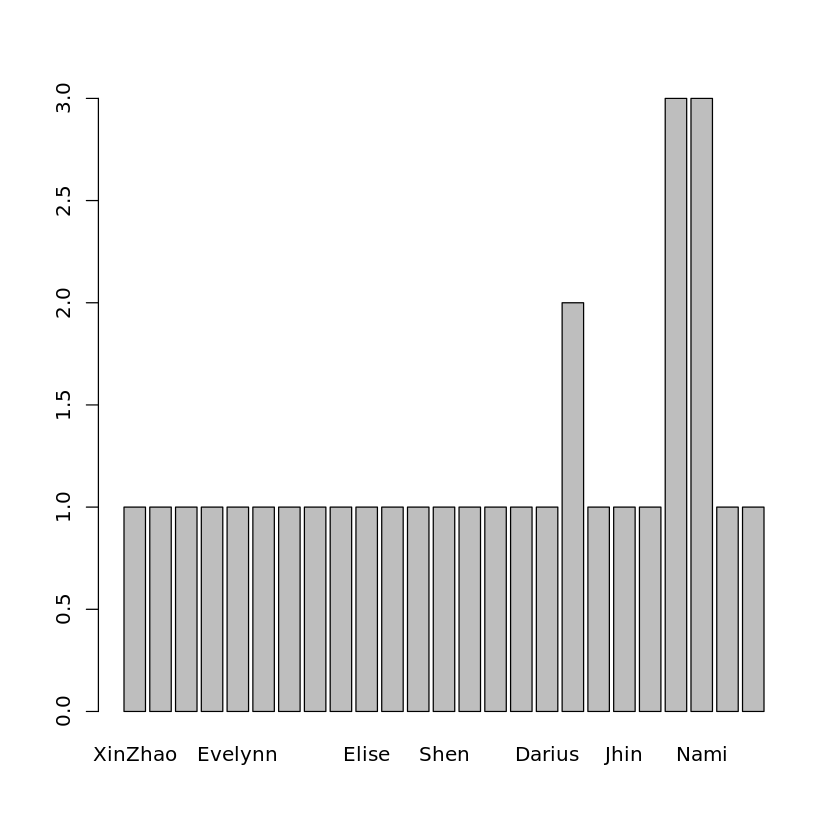

In [251]:
barplot(td,horiz=F)

In [249]:
png(file=".png",
width=2000, height=350)
barplot(td, col="gold")
dev.off()

png 
  2